# Package Download

In [ ]:
!pip install ultralytics

# YOLO Initialization

In [32]:
from ultralytics import YOLO

from IPython.display import Image, clear_output

In [ ]:
model = YOLO('yolov8n.pt')
model.predict(
   source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
   conf=0.25
)

100%|██████████| 6.23M/6.23M [00:00<00:00, 177MB/s]

100%|██████████| 104k/104k [00:00<00:00, 102MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 61.1ms
Speed: 10.5ms preprocess, 61.1ms inference, 44.5ms postprocess per image at shape (1, 3, 640, 384)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# Dataset Download from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uXfqnzjZQwFv56euF3sr")
project = rf.workspace("east-west-uniersity").project("violance-nonviolance")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.205, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to violance-nonviolance-3 in yolov8:: 100%|██████████| 13240/13240 [00:02<00:00, 5157.08it/s]


In [ ]:
dataset.location

'/content/violance-nonviolance-3'

**Remember to update Dataset data.yaml for the location of the train, val, test image folders.**

# Custom YOLO Training
Training yolov8 small

In [28]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=1000

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/violance-nonviolance-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

# Metrics Plots

## Model training plots


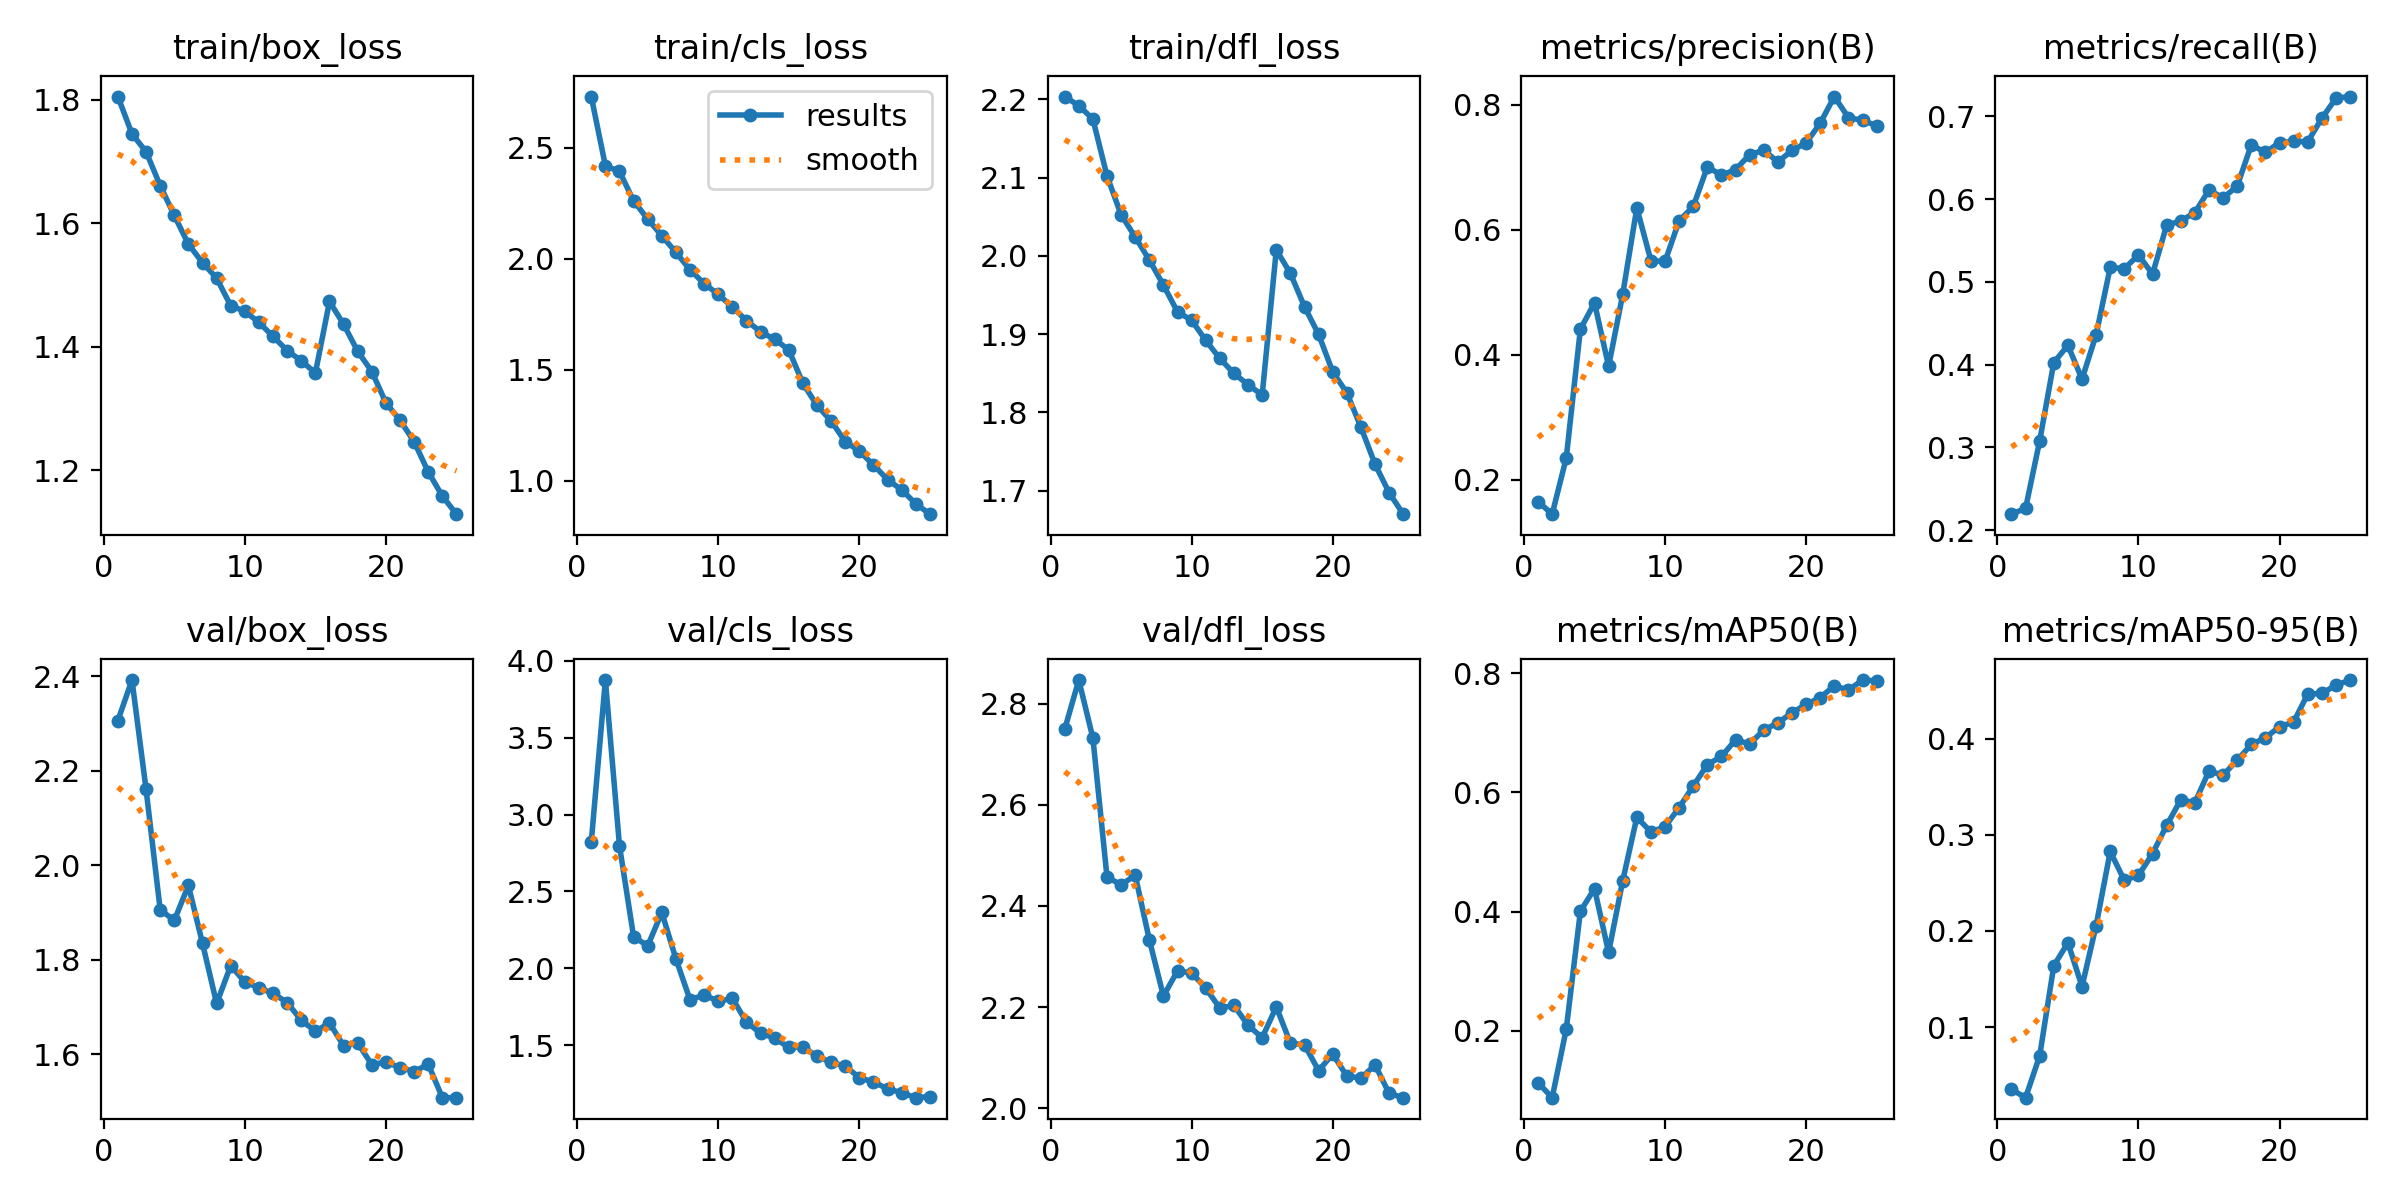

In [48]:
Image(filename='/content/runs/detect/train8/results.png', width=1500, height=800)

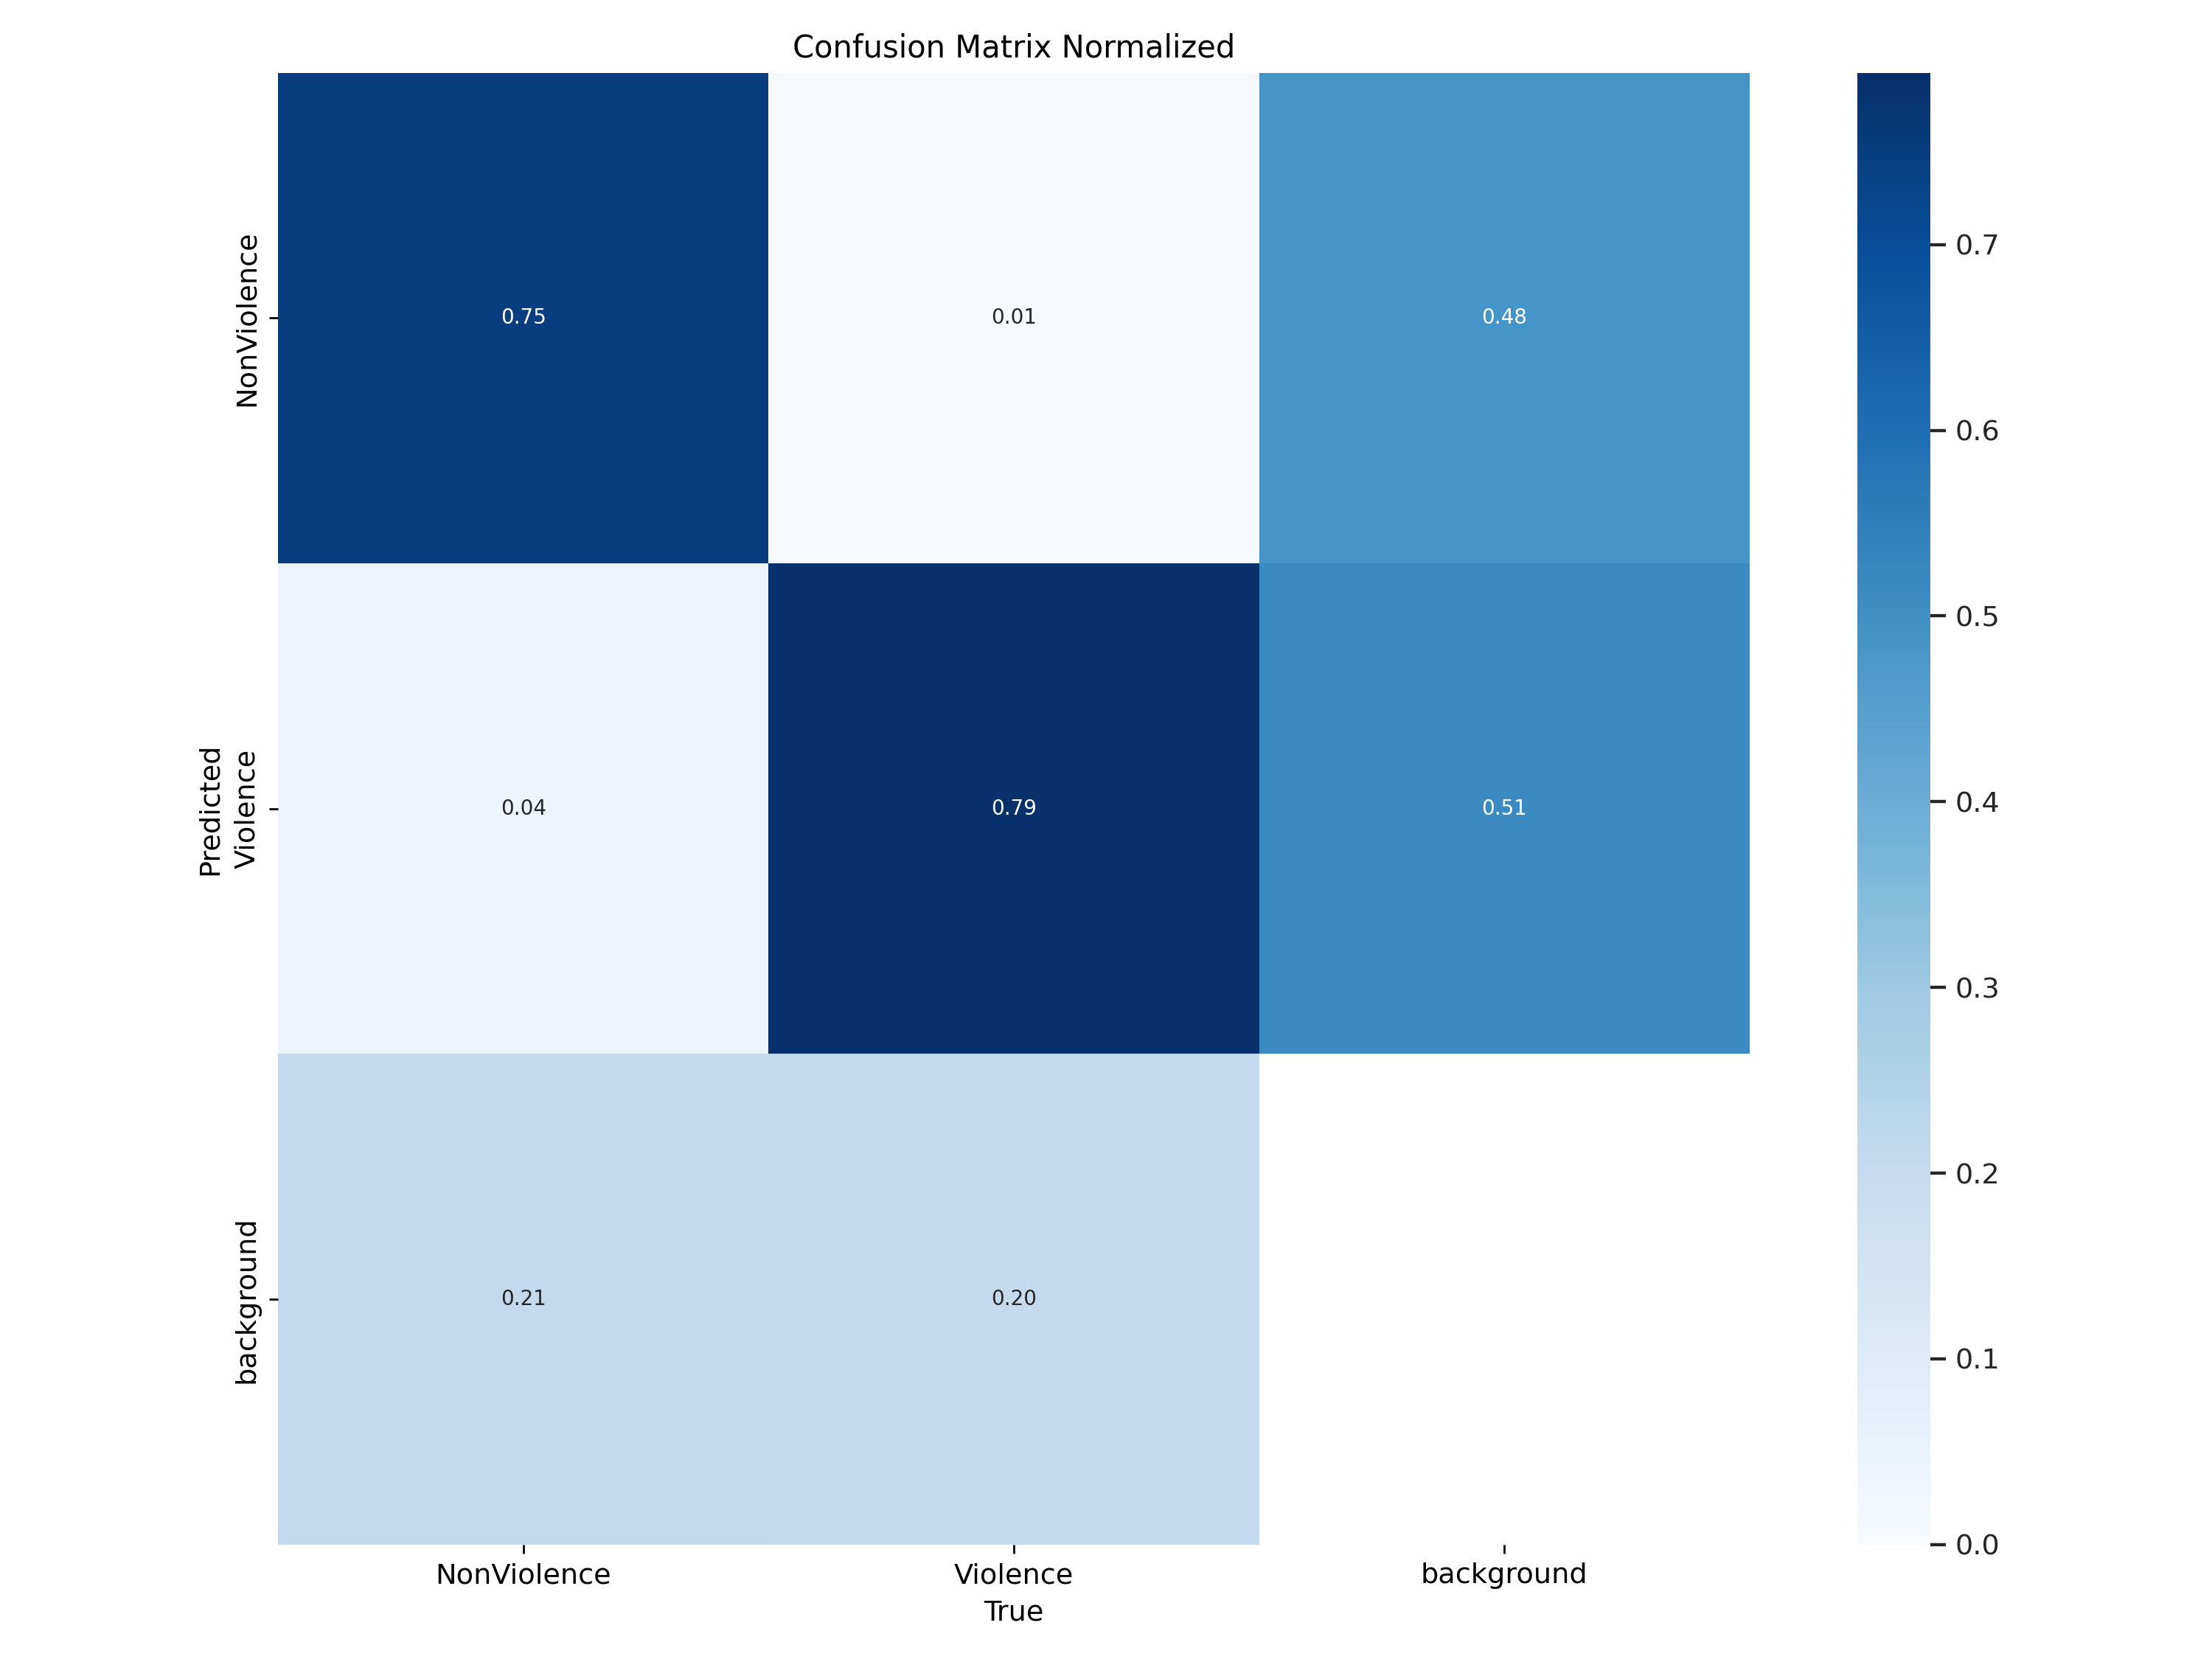

In [41]:
Image(filename='/content/runs/detect/train8/confusion_matrix_normalized.png', width=900, height=800)

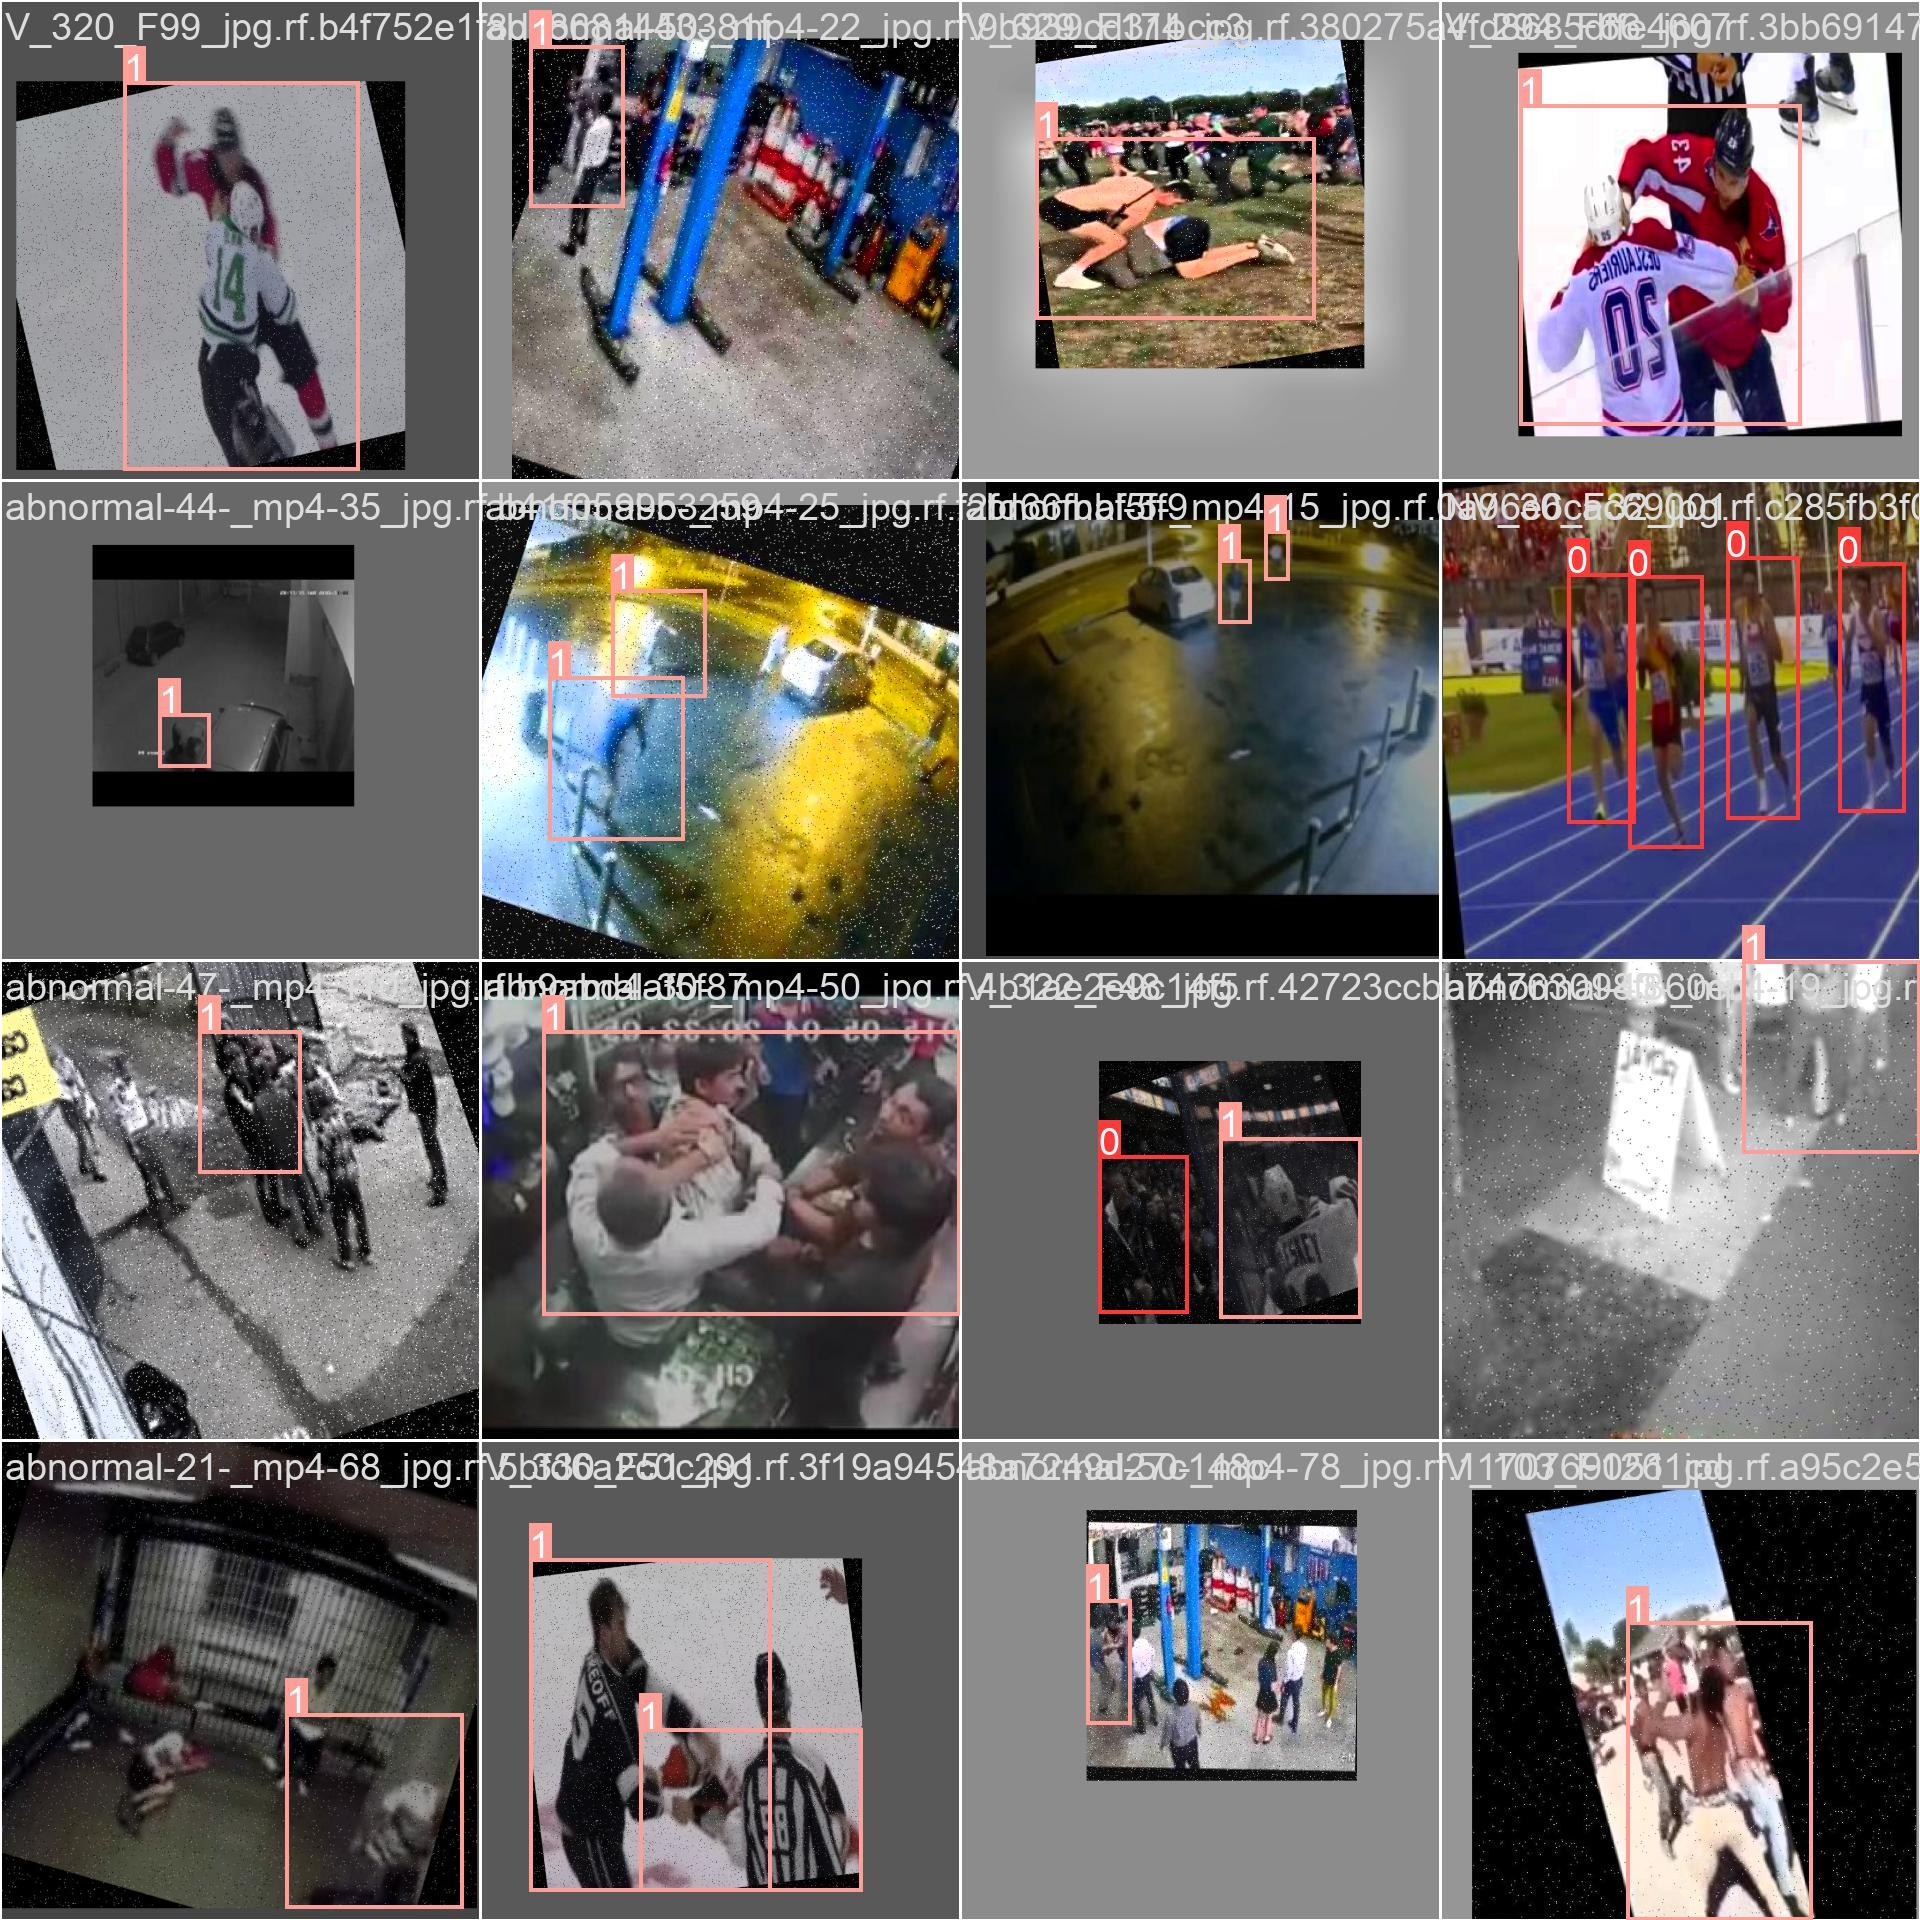

In [42]:
# Training batch model learnings
Image(filename='/content/runs/detect/train8/train_batch5430.jpg', height=800, width=900)

# Evaluation of trained model

In [50]:
!yolo task=detect \
mode=val \
model=/content/runs/detect/train8/weights/best.pt \
data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/violance-nonviolance-3/valid/labels.cache... 551 images, 0 backgrounds, 0 corrupt: 100% 551/551 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 35/35 [00:16<00:00,  2.12it/s]
                   all        551        842      0.769      0.724      0.787      0.462
           NonViolence        551        288      0.743      0.715       0.76      0.472
              Violence        551        554      0.795      0.733      0.815      0.452
Speed: 1.3ms preprocess, 20.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [51]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train8/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/276 /content/violance-nonviolance-3/test/images/NV_140_F12_jpg.rf.65497991c4d794634231f8fc2eb5f49a.jpg: 1024x1024 (no detections), 32.5ms
image 2/276 /content/violance-nonviolance-3/test/images/NV_140_F4_jpg.rf.689ba95d1bac6bceae621fe97a061eaa.jpg: 1024x1024 1 Violence, 32.1ms
image 3/276 /content/violance-nonviolance-3/test/images/NV_152_F64_jpg.rf.cbfc92fa86e0e8d23fc1d272bf8e6629.jpg: 1024x1024 1 NonViolence, 31.8ms
image 4/276 /content/violance-nonviolance-3/test/images/NV_226_F108_jpg.rf.cbd0a6a74861c1e4f54af9b9361ae7a2.jpg: 1024x1024 4 NonViolences, 31.8ms
image 5/276 /content/violance-nonviolance-3/test/images/NV_226_F16_jpg.rf.f521549e112aca702724f2b6692528f4.jpg: 1024x1024 4 NonViolences, 31.8ms
image 6/276 /content/violance-nonviolance-3/test/images/NV_226_F4_jpg.rf.4faf56677a51c038b2234095bee908a6.jpg

# Roboflow Pretrained Model API

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="uXfqnzjZQwFv56euF3sr")
project = rf.workspace().project("violance-nonviolance")
model = project.version(1).model

# infer on a local image
prediction = model.predict("/content/violance-nonviolance-3/test/images/abnormal-52-_mp4-22_jpg.rf.ae8bc2461522e6529a6a5143525c076d.jpg", confidence=40, overlap=30).json()

# visualize your prediction
model.predict("/content/violance-nonviolance-3/test/images/abnormal-52-_mp4-22_jpg.rf.ae8bc2461522e6529a6a5143525c076d.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...


# Inference

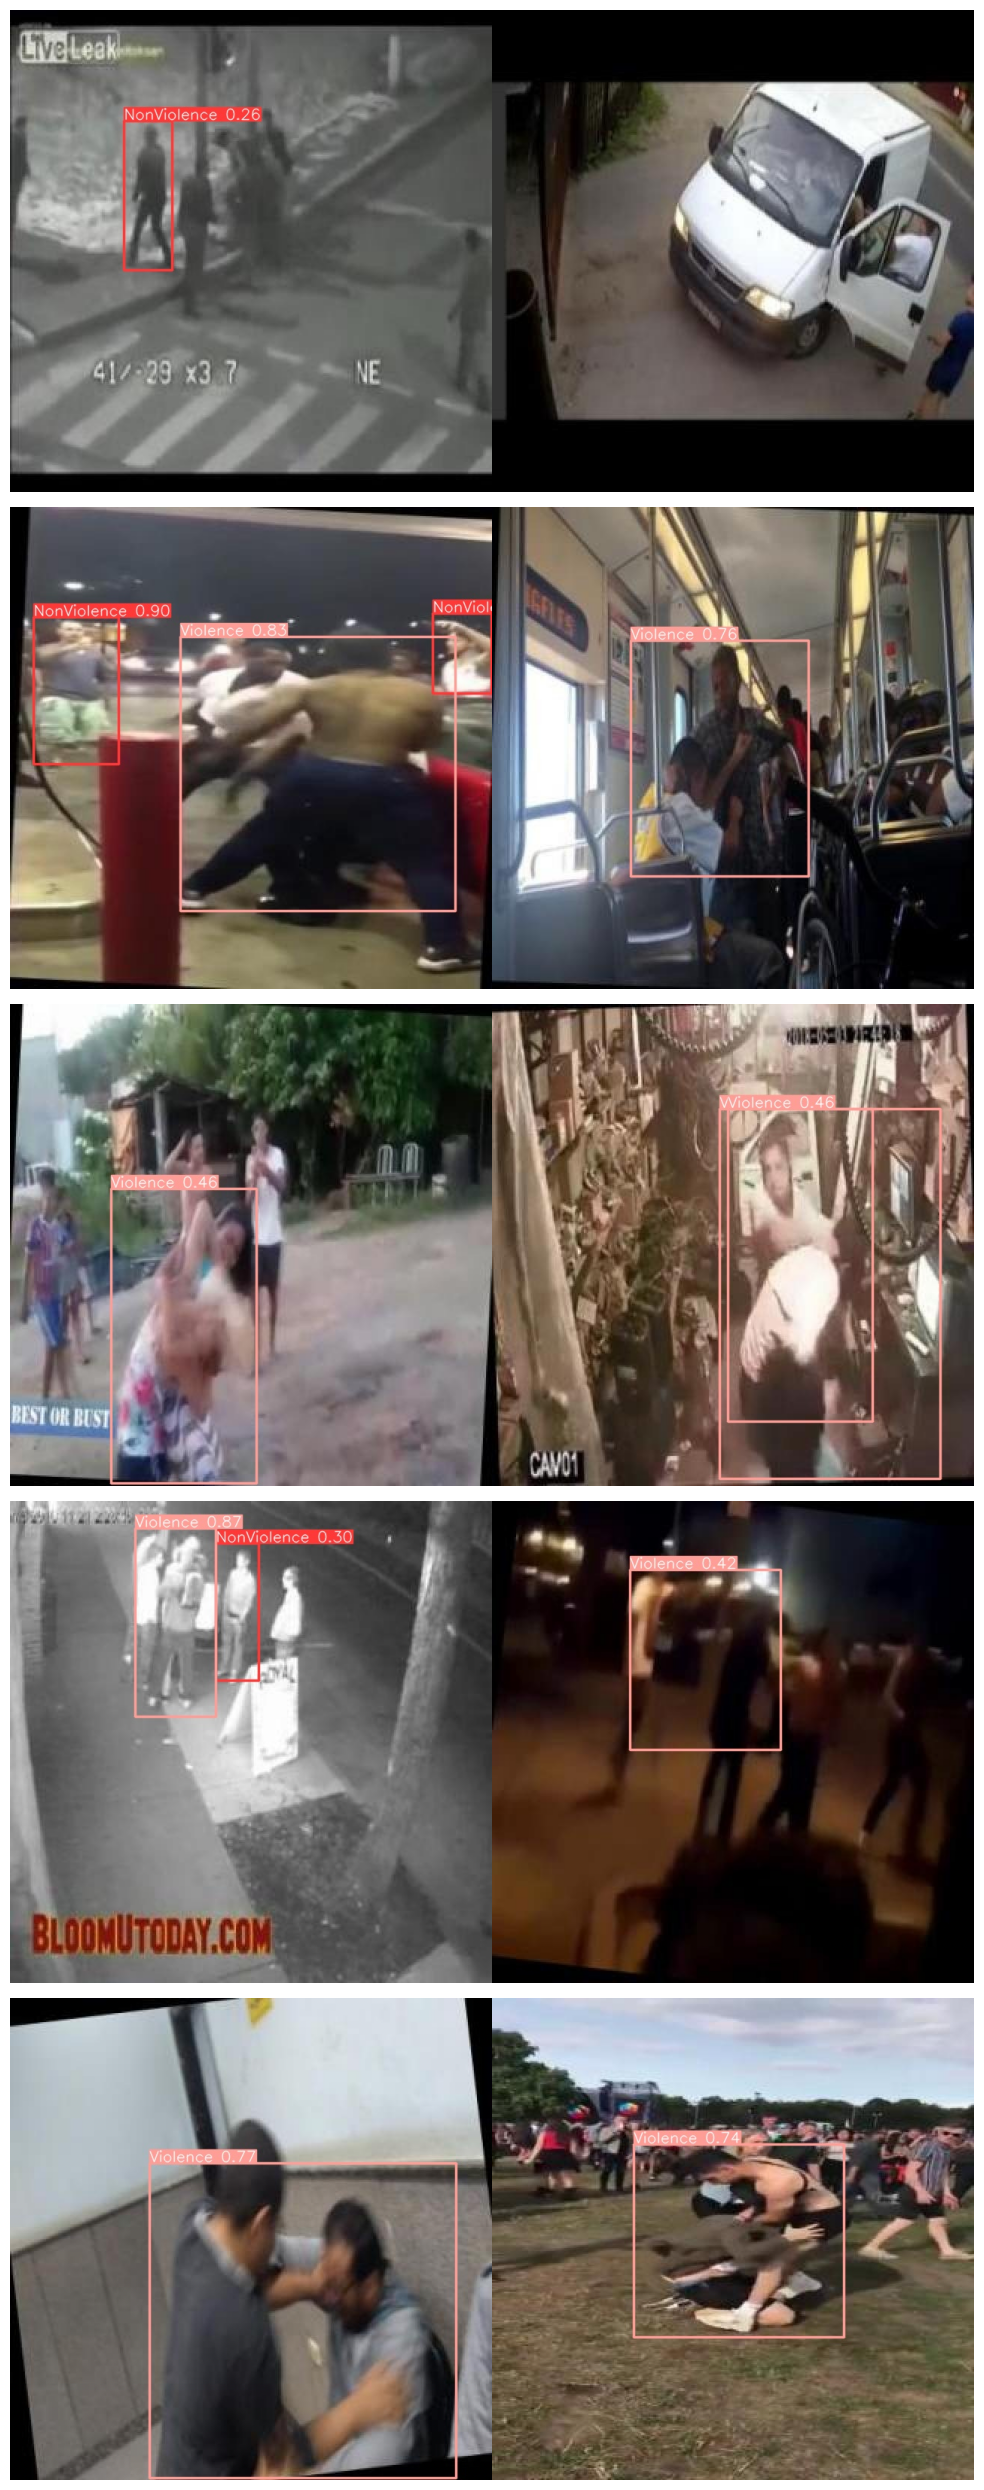

In [61]:
import os
import matplotlib.pyplot as plt

# Define the directory where images are stored
image_directory = "runs/detect/predict"
image_files = [img for img in os.listdir(image_directory) if img.endswith(".jpg")]

# Define the number of images to display
num_images_to_display = 10

# Set up the subplot grid with 5 rows and 2 columns
rows = 5
cols = 2

# Initialize a figure
fig, axes = plt.subplots(rows, cols, figsize=(10, 25))  # Adjust the size as needed
axes = axes.ravel()  # Flatten the array for easy iteration

# Loop through the first 10 images and add them to the subplots
for i, image_file in enumerate(image_files[:num_images_to_display]):
    img = plt.imread(os.path.join(image_directory, image_file))
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis

# If less than 10 images, turn off the remaining subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


# Inference on the Team Images

In [71]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train8/weights/best.pt \
conf=0.5 \
source=/content/team_images

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/7 /content/team_images/fight_0022.jpg: 576x1024 (no detections), 67.4ms
image 2/7 /content/team_images/fight_0172.jpg: 576x1024 1 NonViolence, 20.1ms
image 3/7 /content/team_images/fight_0278.jpg: 576x1024 1 Violence, 20.1ms
image 4/7 /content/team_images/image_1009.jpg: 576x1024 (no detections), 20.2ms
image 5/7 /content/team_images/image_1210.jpg: 576x1024 (no detections), 20.2ms
image 6/7 /content/team_images/image_480.jpg: 576x1024 1 Violence, 20.2ms
image 7/7 /content/team_images/image_509.jpg: 576x1024 (no detections), 20.1ms
Speed: 5.3ms preprocess, 26.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


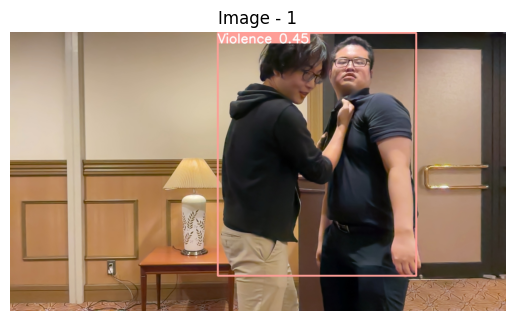

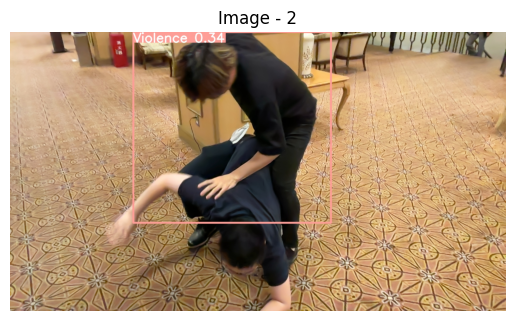

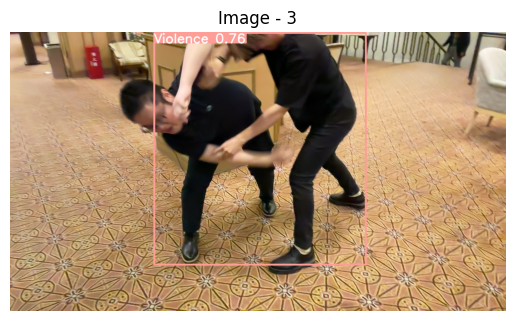

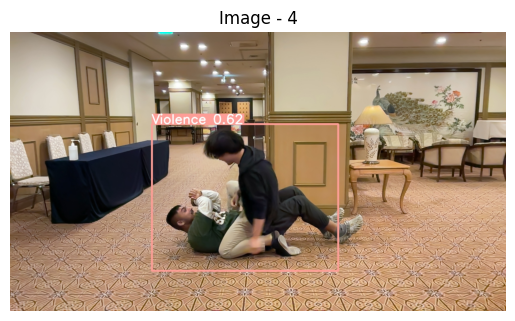

In [73]:
count = 1
for image in os.listdir("/content/runs/detect/predict2"):
    if image.endswith(".jpg"):
        plt.imshow(plt.imread("/content/runs/detect/predict2/" + image))
        plt.axis('off')
        plt.title(f'Image - {count}')
        plt.show()
        count += 1

**From Manual Inferencing the model shows quite a bit of accuracy in predicting fights.**